In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer

# `mltools`: Recipe Book
Author: Leodegario U. Lorenzo II

`mltools` project was made for the convenience of the student in doing ML projects. Oftentimes we copy paste and copy paste code from various notebooks just to run a specific model or perform specific pre-processing. `mltools` hope to solve that by using an all in one integration of all the things we did in our ML1 class.

In this notebook, we will demonstrate the functionalities of `mltools.py`. We will train various models from the *Iris dataset* and *breast cancer dataset* using the functions and classes defined on `mltools.py`.

First let us import the `mltools.py` file.

In [2]:
from mltools import *

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/experimental/enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Doing our import this way gets rid of the hassle of writing `mltools` in front of every function. As such, we can access the functions inside `mltools.py` easily.

The contents of this notebook is structured as follows, 
*Note: The reader is encourage to click on these hyperlinks for easy navigation of the document.*

1. [Training and Testing Machine Learning Models](#1-Training-and-Testing-Machine-Learning-Models)<br>
    1. [Train using selected models](#1.1-Train-using-selected-models)
        1. [Default settings](#1.1.1-Default-settings)
        2. [Specified settings](#1.1.2-Specified-settings)
    2. [Specifying pre-processing procedures](#1.2-Specifying-pre-processing-procedures)
        1. [Scaling](#1.2.1-Specifying-the-scale)
        2. [SMOTE analysis](#1.2.2-Performing-SMOTE-analysis)
        3. [Stratified splitting](#1.2.3-Performing-stratified-splitting)
        4. [Test size](#1.2.4-Specifying-the-test-size)
        5. [Class weights](#1.2.5-Specifying-class-weights)
    3. [Scoring metric](#1.3-Specifying-scoring-metric)
2. [Hypertuning Models](#2-Hypertuning-Models)
    1. [Print to output file](#Specifying-output-file)
    2. [Accuracy versus hyperparameter graph](#Plotting-the-accuracy-versus-hyperparameter-graph)
    3. [Scaling and scorer](#Scaling-and-scorer-parameters)
3. [Interpretation Plots](#3-Interpretation-Plots)
    1. [Regularization plots](#3.1-Regularization-plots)
        1. [Regularization coefficient](#3.1.1-Regularization-coefficient)
        2. [Regularization effect](#3.1.2-Regularization-effect)
        3. [Accuracy versus number of features](#3.1.3-Accuracy-versus-number-of-features)
        4. [Get included features](#3.1.4-Get-included-features)
    2. [Tree feature importance](#3.2-Tree-feature-importance)
    3. [Permutation importance](#3.3-Permutation-importance)
    4. [Partial dependence plots](#3.4-Partial-dependence-plots)

## 1 Training and Testing Machine Learning Models

Let us show the basic procedure when we train machine learning models. First let us extract the California housing dataset from the sklearn library.

In [3]:
# Get the iris dataset
iris_data = load_iris()

# Get input, target, and feature names
X = iris_data.data
label = iris_data.target
feature_names = iris_data.feature_names

Here we will show the functionalities of the `MLModels.run_classifier` function and the `MLModels.summarize` function. A brief summary of the parameters is shown below:

`MLModels.run_classifier` parameters:
1. `X` - input features
2. `labels` - target features
3. `feature_names` - list of feature names
4. `C` - regularization parameter settings
5. `max_depth` - tree max depth settings
6. `n_neighbors` - n neighbor settings for kNN
7. `tree_rs` - tree random state
8. `task` - specifies the task whether classification `C`, or regression `R`
9. `stratify` - whether stratified splitting is to be performed
10. `smote` - whether smote analysis is to be performed
11. `test_size` - proportion of test size
12. `scaling` - pre-processing scaling to be done

`MLModels.summarize` parameters:
1. `methods` - trained and tested `MLModels` object
2. `feature_names` - list of feature names
3. `show_plot` - whether to show accuracy plots
4. `show_top` - whether to show top features on table

Please see the docstring for the respective functions for more details, or scroll down for a demonstration of each parameters.

### 1.1 Train using selected models

Given the input and target features, along with the corresponding feature names, the next step is to train selected models. First let's look at all the available models for us.

In [4]:
MLModels.list_all_methods()

Classification
--------------
1. kNN
2. Logistic (L1)
3. Logistic (L2)
4. SG Logistic (L1)
5. SG Logistic (L2)
6. SVM (L1)
7. SVM (L2)
8. SVM RBF
9. SG SVM (L1)
10. SG SVM (L2)
11. Decision Tree
12. RF Classifier
13. ET Classifier
14. GB Classifier
15. Histogram GBC
16. AdaBoost DT
17. Multinomial NB
18. Complement NB
19. Bernoulli NB
20. MLP Classifier
21. XGB Classifier
22. LightGBM Classifier
23. CatBoost Classifier

Regression
----------
1. kNN
2. Ridge
3. Lasso
4. Elastic Net
5. SVR
6. SVR (RBF)
7. SG SVR
8. SGD Regressor (L2)
9. SGD Regressor (L1)
10. GP Regressor
11. Decision Tree
12. RF Regressor
13. ET Regressor
14. GB Regressor
15. Histogram GBR
16. AdaBoost DT
17. MLP Regressor
18. XGB Regressor
19. LightGBM Regressor
20. CatBoost Regressor


#### 1.1.1 Default settings

There are a lot of models to choose from! Let's just use the basic models we discussed in ML1, the model training and testing using selected models is performed below.

Notice that besides the input, target, and feature names, we also specified various parameters:
1. `task` specifies if the problem is classification `C` or regression `R`.
2. `use_methods` allows us to select which models to train.
3. `n_trials` specify the number of splitting of train and test dataset during the *hold-out validation* procedure.
4. `tree_rs` specifies the random state of the tree models.

In [5]:
# Specify the models to be used
use_methods = ['kNN', 'Logistic (L1)', 'Logistic (L2)', 'SVM (L1)',
               'SVM (L2)', 'SVM RBF', 'Decision Tree']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=10,
                            tree_rs=1337)

Training and testing: kNN model


Iter: 10: 100%|██████████| 500/500 [00:03<00:00, 155.10it/s]


Training and testing: Logistic (L1) model


Iter: 10: 100%|██████████| 210/210 [00:01<00:00, 111.85it/s]


Training and testing: Logistic (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 751.29it/s]


Training and testing: SVM (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 236.01it/s]


Training and testing: SVM (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 884.78it/s]


Training and testing: SVM RBF model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 523.98it/s]


Training and testing: Decision Tree model


Iter: 10: 100%|██████████| 500/500 [00:00<00:00, 784.76it/s]


After training and testing the models, we get the result via the `MLModels.summarize` function. The first argument here must contain the trained and tested `MLModels` object from the previous cell. Additionally, `MLModels.summarize` can also be specified if you want to show the accuracy plots for all models and print the top features using the `show_plot` and `show_top` arguments respectively.

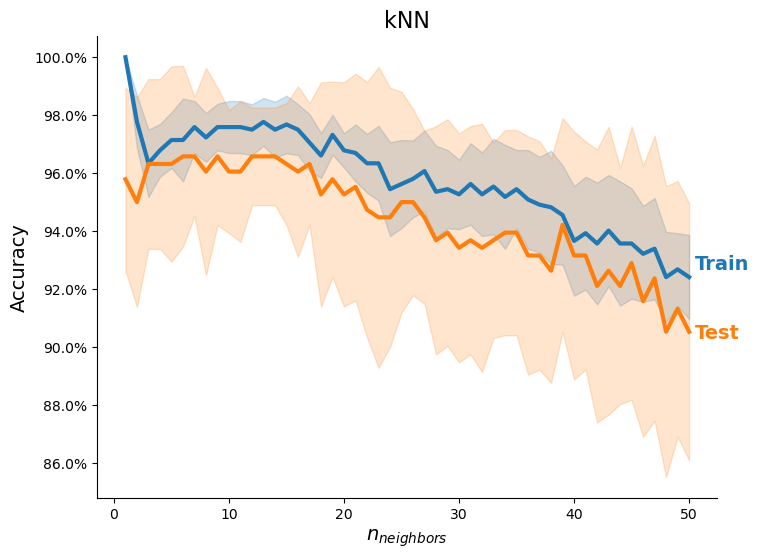

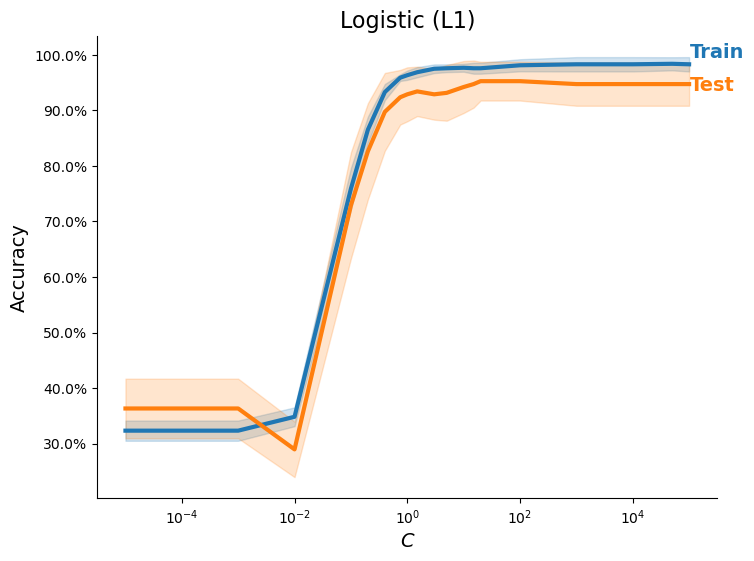

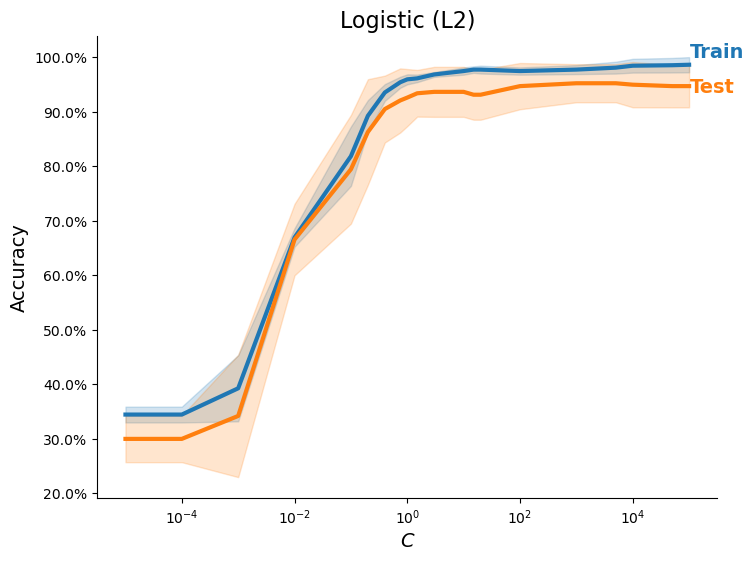

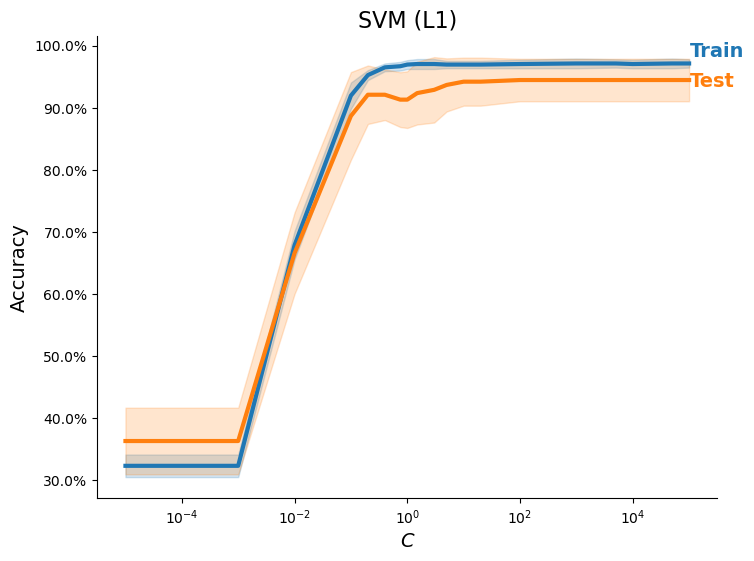

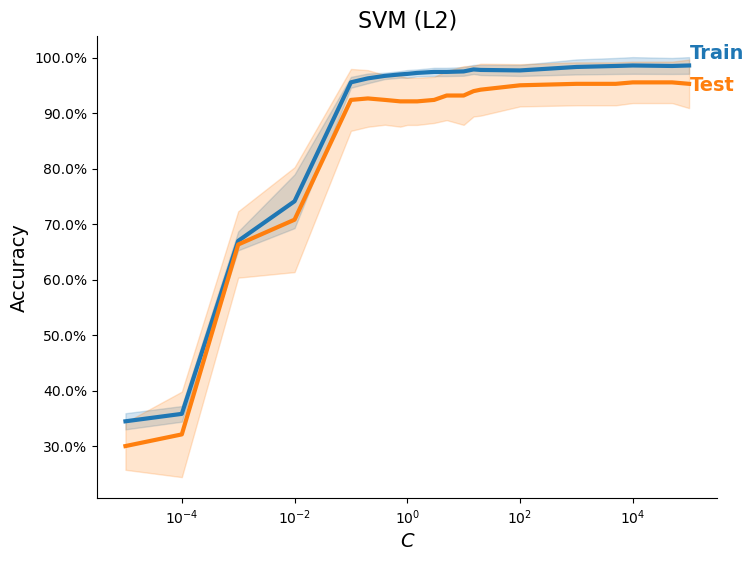

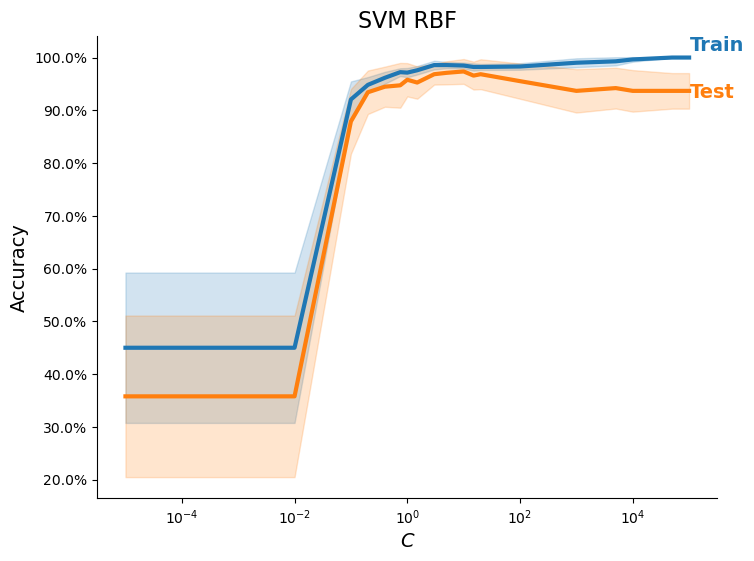

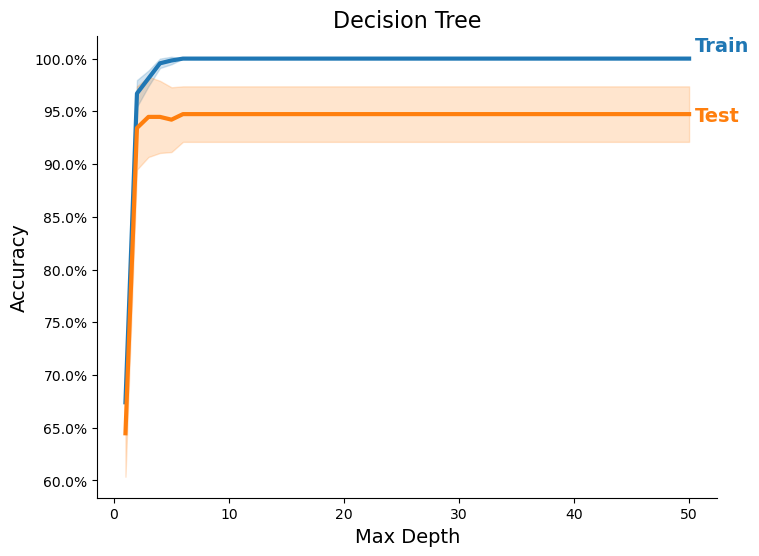

Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,97.14%,96.58%,$n_\text{neighbors} = 6$,0.00 secs,NA
Logistic (L1),98.13%,95.26%,$C = 20$,0.01 secs,petal width (cm)
Logistic (L2),98.13%,95.26%,$C = 1000$,0.00 secs,petal width (cm)
SVM (L1),97.14%,94.47%,$C = 100$,0.00 secs,petal width (cm)
SVM (L2),98.57%,95.53%,$C = 10000$,0.00 secs,petal width (cm)
SVM RBF,98.48%,97.37%,$C = 10$,0.00 secs,NA
Decision Tree,100.00%,94.74%,Max Depth= 6,0.00 secs,petal width (cm)


In [6]:
res = MLModels.summarize(m, feature_names, show_plot=True, show_top=True)

#### 1.1.2 Specified settings

The above example showed the running using the default settings for the hyper parameters. Specifically these values are:
1. `n_neighbors`: 1 to 50
2. `max_depth`: 1 to 50
3. `C` or `alpha` for regularization methods: `[1e-5, 1e-4, 1e-3, .01, 0.1, 0.2, 0.4, 0.75, 1, 1.5, 3, 5, 10, 15, 20, 100, 1000, 5000, 10000, 50000, 100000]`

For computational heavy models, we can opt to modify the settings for a fast run. This is done by specifying the appropriate parameters, `n_neighbors`, `max_depth`, and `C`.

In [7]:
# Specify the models to be used
use_methods = ['kNN', 'SG SVM (L2)', 'RF Classifier', 'GB Classifier']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            n_neighbors=list(range(1, 11)),
                            max_depth=list(range(1, 6)),
                            C=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4],
                            use_methods=use_methods,
                            n_trials=2,
                            tree_rs=1337)
res = MLModels.summarize(m, feature_names, show_top=True)

Training and testing: kNN model


Iter: 2: 100%|██████████| 20/20 [00:00<00:00, 131.97it/s]


Training and testing: SG SVM (L2) model


Iter: 2: 100%|██████████| 18/18 [00:00<00:00, 295.32it/s]


Training and testing: RF Classifier model


Iter: 2: 100%|██████████| 10/10 [00:03<00:00,  2.56it/s]


Training and testing: GB Classifier model


Iter: 2: 100%|██████████| 10/10 [00:01<00:00,  5.04it/s]


Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,97.32%,98.68%,$n_\text{neighbors} = 1$,0.00 secs,NA
SG SVM (L2),95.09%,89.47%,$\alpha = 0.001$,0.00 secs,sepal width (cm)
RF Classifier,100.00%,97.37%,Max Depth= 2,0.28 secs,petal length (cm)
GB Classifier,100.00%,97.37%,Max Depth= 1,0.21 secs,petal width (cm)


### 1.2 Specifying pre-processing procedures

Apart from being able to train all models automatically, some pre-processing specification can also be done automatically. First let's look at how to specify the preprocessing scale to be used.

#### 1.2.1 Specifying the scale

First, we may want to look at which scaling parameters are avaialable to us. This is performed using the code below

In [8]:
print("Scaling Methods\n"+"-"*15)
for i, scale in enumerate(MLModels.scalers().keys()):
    print(f'{i+1}. {scale}')

Scaling Methods
---------------
1. standard
2. minmax
3. maxabs
4. robust
5. power
6. quantile


Let's redo the analysis performed in the previous section but this time using a standard scaler.

In [9]:
# Specify the models to be used
use_methods = ['kNN', 'Logistic (L1)', 'Logistic (L2)', 'SVM (L1)',
               'SVM (L2)', 'SVM RBF', 'Decision Tree']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=10,
                            tree_rs=1337,
                            scaling='standard')
res = MLModels.summarize(m, feature_names, show_top=True)

Training and testing: kNN model


Iter: 10: 100%|██████████| 500/500 [00:03<00:00, 153.78it/s]


Training and testing: Logistic (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 377.57it/s]


Training and testing: Logistic (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 768.11it/s]


Training and testing: SVM (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 429.80it/s]


Training and testing: SVM (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 858.94it/s]


Training and testing: SVM RBF model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 494.33it/s]


Training and testing: Decision Tree model


Iter: 10: 100%|██████████| 500/500 [00:00<00:00, 775.61it/s]


Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,96.43%,96.58%,$n_\text{neighbors} = 8$,0.00 secs,NA
Logistic (L1),98.39%,94.21%,$C = 100$,0.00 secs,petal length (cm)
Logistic (L2),98.57%,94.21%,$C = 5000$,0.00 secs,petal length (cm)
SVM (L1),98.30%,93.95%,$C = 1000$,0.00 secs,petal length (cm)
SVM (L2),98.57%,93.68%,$C = 1000$,0.00 secs,petal length (cm)
SVM RBF,97.68%,95.53%,$C = 1$,0.00 secs,NA
Decision Tree,100.00%,94.74%,Max Depth= 6,0.00 secs,petal width (cm)


#### 1.2.2 Performing SMOTE analysis

For imbalanced datasets, we could also set the `run_classifier` function to perform SMOTE using the `smote` parameter.

In [10]:
# Specify the models to be used
use_methods = ['kNN', 'Logistic (L1)', 'Logistic (L2)', 'SVM (L1)',
               'SVM (L2)', 'SVM RBF', 'Decision Tree']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=10,
                            tree_rs=1337,
                            scaling='standard',
                            smote=True)
res = MLModels.summarize(m, feature_names, show_top=True)

Training and testing: kNN model


Iter: 10: 100%|██████████| 500/500 [00:03<00:00, 149.32it/s]


Training and testing: Logistic (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 299.85it/s]


Training and testing: Logistic (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 716.35it/s]


Training and testing: SVM (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 418.05it/s]


Training and testing: SVM (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 671.44it/s]


Training and testing: SVM RBF model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 391.56it/s]


Training and testing: Decision Tree model


Iter: 10: 100%|██████████| 500/500 [00:00<00:00, 754.17it/s]


Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,96.30%,96.32%,$n_\text{neighbors} = 10$,0.00 secs,NA
Logistic (L1),98.40%,94.47%,$C = 100$,0.00 secs,petal length (cm)
Logistic (L2),98.73%,94.21%,$C = 5000$,0.00 secs,petal length (cm)
SVM (L1),98.23%,93.68%,$C = 100000$,0.00 secs,petal length (cm)
SVM (L2),98.65%,93.68%,$C = 1000$,0.00 secs,petal length (cm)
SVM RBF,97.73%,95.53%,$C = 1$,0.00 secs,NA
Decision Tree,100.00%,94.74%,Max Depth= 6,0.00 secs,petal width (cm)


#### 1.2.3 Performing stratified splitting

On the other hand, we may also want to do stratified splitting instead of using SMOTE to handle imbalanced datasets. We specify instead the `stratify` parameter as `True`.

In [11]:
# Specify the models to be used
use_methods = ['kNN', 'Logistic (L1)', 'Logistic (L2)', 'SVM (L1)',
               'SVM (L2)', 'SVM RBF', 'Decision Tree']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=10,
                            tree_rs=1337,
                            scaling='standard',
                            stratify=True)
res = MLModels.summarize(m, feature_names, show_top=True)

Training and testing: kNN model


Iter: 10: 100%|██████████| 500/500 [00:03<00:00, 150.79it/s]


Training and testing: Logistic (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 266.31it/s]


Training and testing: Logistic (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 800.06it/s]


Training and testing: SVM (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 422.23it/s]


Training and testing: SVM (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 662.94it/s]


Training and testing: SVM RBF model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 479.65it/s]


Training and testing: Decision Tree model


Iter: 10: 100%|██████████| 500/500 [00:00<00:00, 757.56it/s]


Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,96.43%,95.53%,$n_\text{neighbors} = 11$,0.00 secs,NA
Logistic (L1),97.59%,95.53%,$C = 100$,0.00 secs,petal length (cm)
Logistic (L2),97.41%,95.53%,$C = 1000$,0.00 secs,petal length (cm)
SVM (L1),97.14%,95.26%,$C = 15$,0.00 secs,petal length (cm)
SVM (L2),96.34%,95.00%,$C = 1.5$,0.00 secs,petal length (cm)
SVM RBF,98.75%,95.79%,$C = 10$,0.00 secs,NA
Decision Tree,97.23%,94.47%,Max Depth= 3,0.00 secs,petal width (cm)


#### 1.2.4 Specifying the test size

Finally we show also that we can vary the test size using the `test_size` parameter.

In [12]:
# Specify the models to be used
use_methods = ['kNN', 'Logistic (L1)', 'Logistic (L2)', 'SVM (L1)',
               'SVM (L2)', 'SVM RBF', 'Decision Tree']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=10,
                            tree_rs=1337,
                            scaling='standard',
                            stratify=True,
                            test_size=0.20)
res = MLModels.summarize(m, feature_names, show_top=True)

Training and testing: kNN model


Iter: 10: 100%|██████████| 500/500 [00:03<00:00, 160.31it/s]


Training and testing: Logistic (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 329.15it/s]


Training and testing: Logistic (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 808.14it/s]


Training and testing: SVM (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 420.30it/s]


Training and testing: SVM (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 818.97it/s]


Training and testing: SVM RBF model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 490.79it/s]


Training and testing: Decision Tree model


Iter: 10: 100%|██████████| 500/500 [00:00<00:00, 692.80it/s]


Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,96.58%,96.67%,$n_\text{neighbors} = 12$,0.00 secs,NA
Logistic (L1),97.25%,97.33%,$C = 1000$,0.01 secs,petal length (cm)
Logistic (L2),97.33%,97.33%,$C = 10000$,0.00 secs,petal length (cm)
SVM (L1),97.17%,97.33%,$C = 5000$,0.00 secs,petal length (cm)
SVM (L2),97.42%,97.00%,$C = 1000$,0.00 secs,petal length (cm)
SVM RBF,97.50%,96.33%,$C = 1$,0.00 secs,NA
Decision Tree,100.00%,95.33%,Max Depth= 6,0.00 secs,petal width (cm)


#### 1.2.5 Specifying class weights

Specify class weights using the `class_weight` parameter

In [13]:
# Specify the models to be used
use_methods = ['Logistic (L1)', 'Logistic (L2)', 'SVM (L1)', 'SVM (L2)',
               'Decision Tree']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            n_neighbors=list(range(1, 11)),
                            max_depth=list(range(1, 6)),
                            C=[1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100, 1e3, 1e4],
                            use_methods=use_methods,
                            n_trials=2,
                            tree_rs=1337,
                            class_weight={0: 1, 1: 100, 2: 1})
res = MLModels.summarize(m, feature_names, show_top=True)

Training and testing: Logistic (L1) model


Iter: 2: 100%|██████████| 18/18 [00:00<00:00, 124.63it/s]


Training and testing: Logistic (L2) model


Iter: 2: 100%|██████████| 18/18 [00:00<00:00, 549.58it/s]


Training and testing: SVM (L1) model


Iter: 2: 100%|██████████| 18/18 [00:00<00:00, 237.96it/s]


Training and testing: SVM (L2) model


Iter: 2: 100%|██████████| 18/18 [00:00<00:00, 560.00it/s]


Training and testing: Decision Tree model


Iter: 2: 100%|██████████| 10/10 [00:00<00:00, 353.63it/s]


Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
Logistic (L1),93.30%,97.37%,$C = 100$,0.01 secs,petal length (cm)
Logistic (L2),94.64%,96.05%,$C = 1000.0$,0.00 secs,petal length (cm)
SVM (L1),91.96%,96.05%,$C = 10$,0.00 secs,petal width (cm)
SVM (L2),95.09%,97.37%,$C = 1000.0$,0.00 secs,petal length (cm)
Decision Tree,98.66%,96.05%,Max Depth= 3,0.00 secs,petal width (cm)


### 1.3 Specifying scoring metric

We can also specify the scoring metric to be used using the `scorer` parameter. First, let's list the available scorers for us.

In [14]:
print("Scoring Metrics\n"+"-"*15)
for i, scorer in enumerate(MLModels.scorers().keys()):
    print(f"{i+1}. {scorer}")

Scoring Metrics
---------------
1. balanced
2. cohen_kappa
3. hinge
4. matthews
5. roc_auc
6. f1
7. hamming
8. jaccard
9. log_loss
10. precision
11. recall
12. zero_one
13. explained_variance
14. max_error
15. mean_absolute
16. mean_squared
17. mean_squared_log
18. median_absolute


Note that some scoring metric are only compatible to classification or regression task exclusively. Let's test and use `cohen_kappa` on our previous problem.

In [15]:
# Specify the models to be used
use_methods = ['kNN', 'Logistic (L1)', 'Logistic (L2)', 'SVM (L1)',
               'SVM (L2)', 'SVM RBF', 'Decision Tree']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=10,
                            tree_rs=1337,
                            scaling='standard',
                            stratify=True,
                            test_size=0.20,
                            scorer='cohen_kappa')
res = MLModels.summarize(m, feature_names, show_top=True)

Training and testing: kNN model


Iter: 10: 100%|██████████| 500/500 [00:03<00:00, 140.58it/s]


Training and testing: Logistic (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 277.79it/s]


Training and testing: Logistic (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 528.68it/s]


Training and testing: SVM (L1) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 269.81it/s]


Training and testing: SVM (L2) model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 466.66it/s]


Training and testing: SVM RBF model


Iter: 10: 100%|██████████| 210/210 [00:00<00:00, 375.27it/s]


Training and testing: Decision Tree model


Iter: 10: 100%|██████████| 500/500 [00:00<00:00, 512.00it/s]


Model,Train Accuracy,Test Accuracy,Best Parameter,Train Time,Top Predictor
kNN,94.88%,95.00%,$n_\text{neighbors} = 12$,0.00 secs,NA
Logistic (L1),96.00%,96.00%,$C = 1000$,0.01 secs,petal length (cm)
Logistic (L2),96.00%,96.00%,$C = 10000$,0.00 secs,petal length (cm)
SVM (L1),95.75%,95.50%,$C = 20$,0.00 secs,petal length (cm)
SVM (L2),96.12%,95.50%,$C = 1000$,0.00 secs,petal length (cm)
SVM RBF,96.25%,94.50%,$C = 1$,0.00 secs,NA
Decision Tree,100.00%,93.00%,Max Depth= 6,0.00 secs,petal width (cm)


## 2 Hypertuning Models

The functions from the above section enables us to get a good first look of the performance of several models all at once. However, usually we want to optimize further the models by performing finer hyperparemeter tuning on some selected models. Here, we demonstrate this functionality using the `tune_model` function. A quick look of the parameters of the `tune_model` function is as follows:

`tune_model` parameters:
1. `X` - input features
2. `label` - target features
3. `task` - specifies `Classification` or `Regression`
4. `model` - specify the model to be tuned
5. `params` - dictionary of the parameters to be tuned
6. `n_trials` - number of splitting trials
7. `tree_rs` - tree random state
8. `write_to_file` - filename of output file
9. `to_plot` - plot accuracy vs hyperparameter setting. Only works for $\leq$ 2 hyperparameter settings
10. `scorer` - scorer to be used
11. `scaling` - preprocessing scaling to be used

### Specifying models and parameters

In our problem, let us hyperparameter tune a `GradientBoostingClassifier` using the settings:
1. `max_depth` - 1 to 5
2. `learning_rate` - 0.10 to 1.00 with a 0.10 step
This is performed using the code below. The output is a dictionary summarizing the result.

In [16]:
tune_model(X, label, 'Classification', 'GB Classifier',
           params={'max_depth': list(range(1, 6)),
                   'learning_rate': np.arange(0.10, 1.10, 0.10)},
           n_trials=2, tree_rs=1337)

  3%|▎         | 3/100 [00:00<00:14,  6.85it/s]

params:{'max_depth': 1, 'learning_rate': 0.1} 	score: 0.973684	std: 0.000000


100%|██████████| 100/100 [00:15<00:00,  6.29it/s]


{'Model': 'GB Classifier',
 'Accuracy': '97.37%',
 'Best Parameter': {'max_depth': 1, 'learning_rate': 0.1},
 'Classifier': GradientBoostingClassifier(max_depth=1, random_state=1337),
 'acc': 97.37,
 'std': 0.0}

### Specifying output file

In most cases, we want to run the hyperparameter tuning while we are doing other task such as studying or sleeping. In this case, we want the output to be written on an external file. This can be specified using the `write_to_file` parameter. Here, we will save the Random Forest hypertuning on the `rf.txt` file.

In [17]:
tune_model(X, label, 'Classification', 'RF Classifier',
           params={'max_depth': list(range(1, 6)),
                   'n_estimators': [50, 100, 200, 300]},
           write_to_file='rf.txt',
           n_trials=2, tree_rs=1337)

  5%|▌         | 2/40 [00:00<00:05,  6.71it/s]

params:{'max_depth': 1, 'n_estimators': 50} 	score: 0.618421	std: 0.039474


 15%|█▌        | 6/40 [00:02<00:14,  2.28it/s]

params:{'max_depth': 1, 'n_estimators': 200} 	score: 0.631579	std: 0.052632


 25%|██▌       | 10/40 [00:04<00:12,  2.42it/s]

params:{'max_depth': 2, 'n_estimators': 50} 	score: 0.934211	std: 0.039474


 30%|███       | 12/40 [00:04<00:10,  2.77it/s]

params:{'max_depth': 2, 'n_estimators': 100} 	score: 0.973684	std: 0.000000


100%|██████████| 40/40 [00:19<00:00,  2.03it/s]


{'Model': 'RF Classifier',
 'Accuracy': '97.37%',
 'Best Parameter': {'max_depth': 2, 'n_estimators': 100},
 'Classifier': RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=1337),
 'acc': 97.37,
 'std': 0.0}

### Plotting the accuracy versus hyperparameter graph

Additionally, we could inspect the behavior of the accuracy depending on the hyper parameter setting. This would guide our steps for tuning the model in a finer scale. We specify this functionality by supplying `True` to the `to_plot` parameter.

  5%|▌         | 2/40 [00:00<00:05,  6.48it/s]

params:{'max_depth': 1, 'n_estimators': 50} 	score: 0.618421	std: 0.039474


 15%|█▌        | 6/40 [00:02<00:14,  2.36it/s]

params:{'max_depth': 1, 'n_estimators': 200} 	score: 0.631579	std: 0.052632


 25%|██▌       | 10/40 [00:03<00:11,  2.58it/s]

params:{'max_depth': 2, 'n_estimators': 50} 	score: 0.934211	std: 0.039474


 30%|███       | 12/40 [00:04<00:09,  2.93it/s]

params:{'max_depth': 2, 'n_estimators': 100} 	score: 0.973684	std: 0.000000


100%|██████████| 40/40 [00:18<00:00,  2.12it/s]


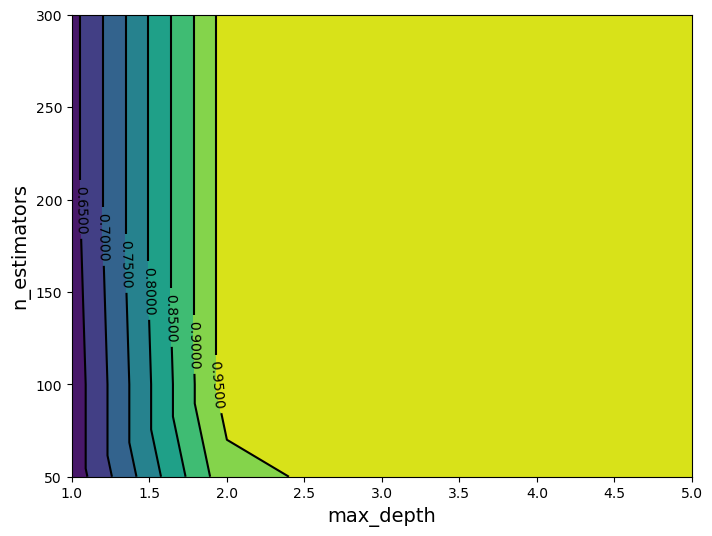

{'Model': 'RF Classifier',
 'Accuracy': '97.37%',
 'Best Parameter': {'max_depth': 2, 'n_estimators': 100},
 'Classifier': RandomForestClassifier(max_depth=2, n_jobs=-1, random_state=1337),
 'acc': 97.37,
 'std': 0.0}

In [18]:
tune_model(X, label, 'Classification', 'RF Classifier',
           params={'max_depth': list(range(1, 6)),
                   'n_estimators': [50, 100, 200, 300]},
           write_to_file='rf.txt',
           to_plot=True,
           n_trials=2, tree_rs=1337)

### Scaling and scorer parameters

Finally, we demonstrate that the scaling and scorer function can also be carried out in the `tune_model` function.

In [19]:
tune_model(X, label, 'Classification', 'GB Classifier',
           params={'max_depth': list(range(1, 6)),
                   'learning_rate': np.arange(0.10, 1.10, 0.10)},
           scaling='power', scorer='balanced',
           n_trials=2, tree_rs=1337)

  3%|▎         | 3/100 [00:00<00:15,  6.13it/s]

params:{'max_depth': 1, 'learning_rate': 0.1} 	score: 0.979167	std: 0.000000


100%|██████████| 100/100 [00:15<00:00,  6.29it/s]


{'Model': 'GB Classifier',
 'Accuracy': '97.92%',
 'Best Parameter': {'max_depth': 1, 'learning_rate': 0.1},
 'Classifier': GradientBoostingClassifier(max_depth=1, random_state=1337),
 'acc': 97.92,
 'std': 0.0}

## 3 Interpretation Plots

Aside from inspecting the accuracy of the trained machine learning models, `mltools` also provides us with plotting of the standard interpretation plots discussed in class. We feature some of these below. The list of these functions and a brief description of their purpose is enumerated below:

1. Regularization
    1. `MLModels.plot_coef` - plots the coefficient per regularization setting: Inspects which features die out first during regularization.
    2. `MLModels.plot_regularization` - plots the effect of regularization with respect to predictability. Inspects which features are left out and their corresponding effect during regularization.
    3. `MLModels.plot_accuracy_num_features` - plot the accuracy versus number of feature. Inspects the effect of number of features included in the predictability of the model.
    4. `MLModels.get_included_features` - return the included features during regularization. Shows which features are retained during a specific regularization setting.
2. Tree feature importance
    1. `MLModels.plot_feature_importance` - plots the feature importance for tree models. Shows which features are deemed important by the model.
3. Permutation importance
    1. `MLModels.plot_permutation_importance` - plots the feature importance for any estimator via permutation importance method. Shows which features are deemed important by the model.
4. Partial dependence
    1. `MLModels.plot_partial_dependence` - plots the partial dependence graph for any estimator. Shows the marginal effects of the features with respect to the prediction.

Here we use instead the *Breast cancer dataset* for us to appreciate the feature selection and feature importance interpretation plots.

In [20]:
# Load the breast cancer dataset
breast_cancer = load_breast_cancer()

# Get input, target, and feature names
X = breast_cancer.data
label = breast_cancer.target
feature_names = breast_cancer.feature_names

### 3.1 Regularization plots

Regularization is a great procedure for feature selection as it narrows down the important features through its increase. We will show various interpretability plots that we can perform using the `mltools` function. Let us first train a standard Logistic L1 regularization model for our analysis,

In [21]:
# Specify the models to be used
use_methods = ['Logistic (L1)']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=10, scaling='standard',
                            tree_rs=1337)

Training and testing: Logistic (L1) model


Iter: 10: 100%|██████████| 210/210 [00:11<00:00, 18.41it/s]


#### 3.1.1 Regularization coefficient

First is the standard coefficient versus setting plot, this is the standard procedure for identifying which features first die out during regularization. This is performed by calling the `plot_coef` method of the `MLModels` object.

/home/llorenzo/year-2022/Acads/ml1/mltools/mltools.py:434: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(sorted([ylim, -ylim]))


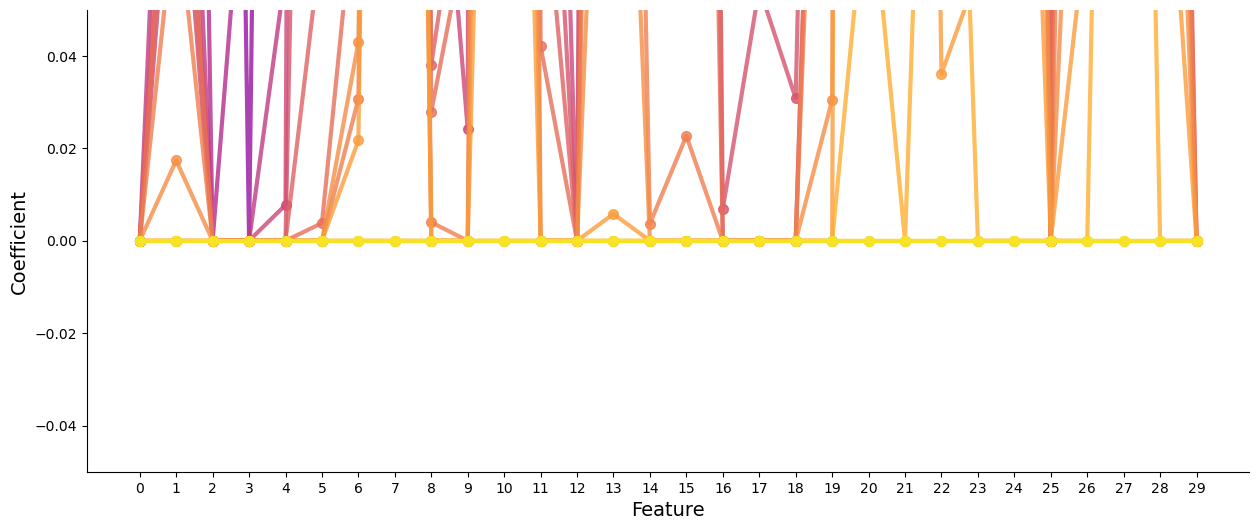

In [22]:
ax = m['Logistic (L1)'].plot_coef()

Here we see several features are left after some regularization. The more yellow the point, means that it was retained at higher regularizations. In this case it seems that feature `10`, feature `20`, and feature `23` are the retained features. These are namely: 

In [23]:
for i, feature in enumerate(feature_names[[10, 20, 23]]):
    print(f"{i+1}. {feature}")

1. radius error
2. worst radius
3. worst area


#### 3.1.2 Regularization effect

The above plot does not show the effect of each feature on the accuracy, the next function, `MLModels.plot_regularization`, shows it via a series of subplots.

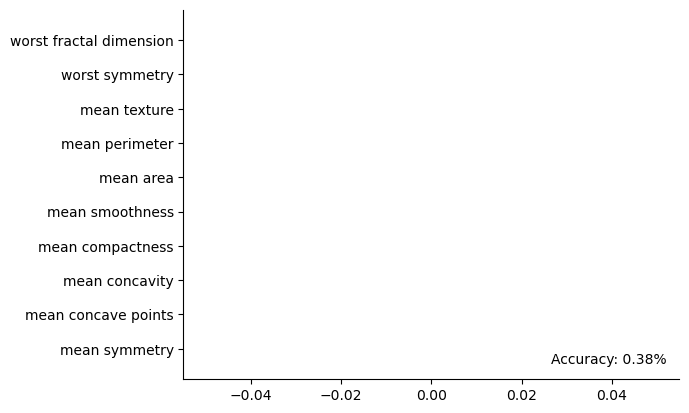

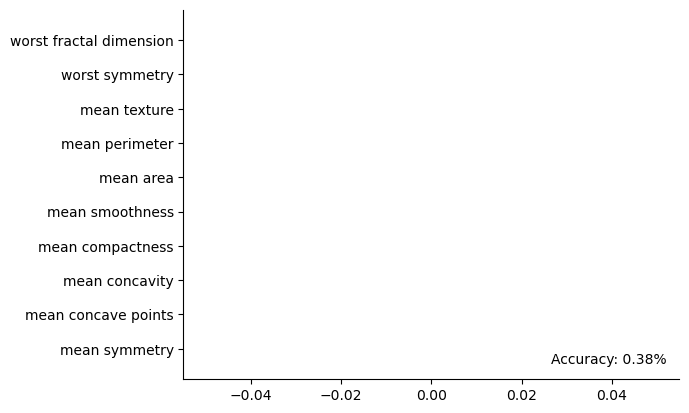

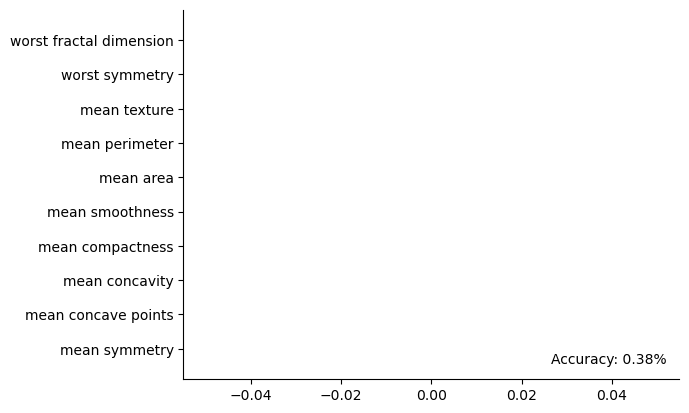

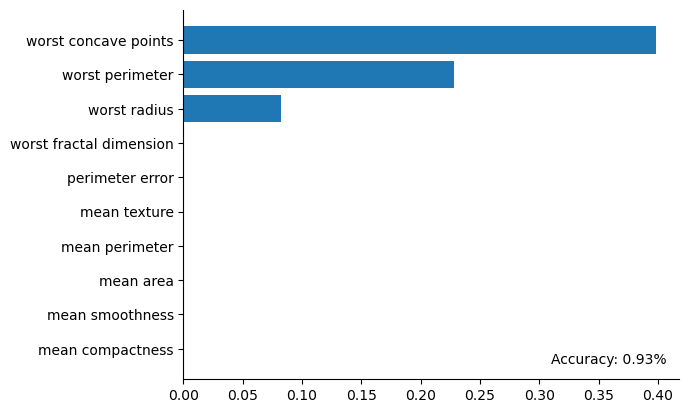

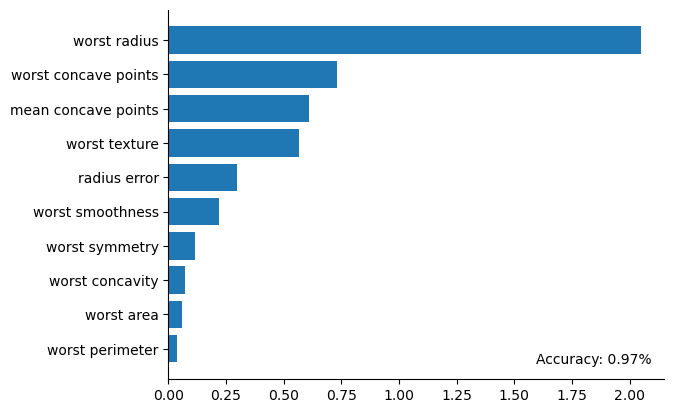

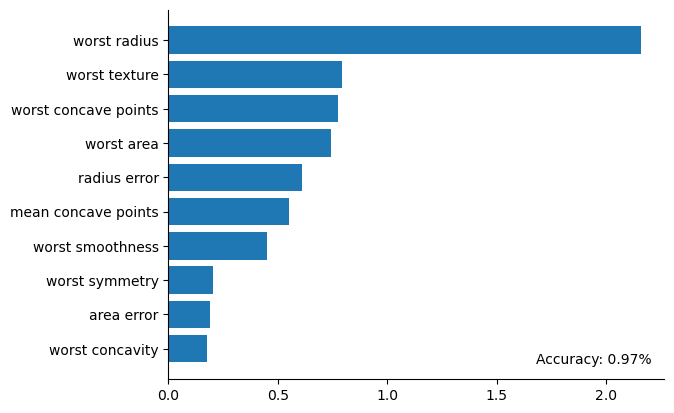

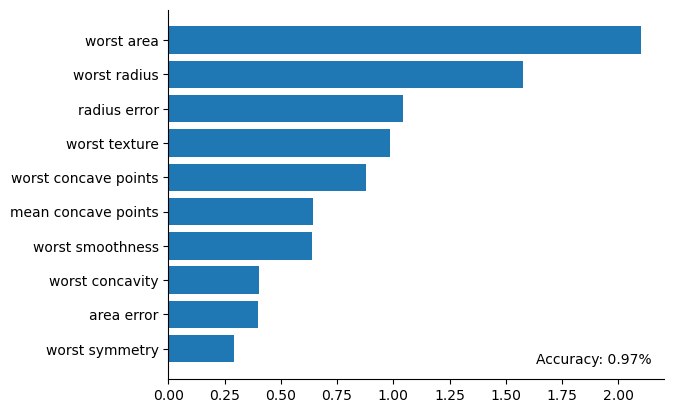

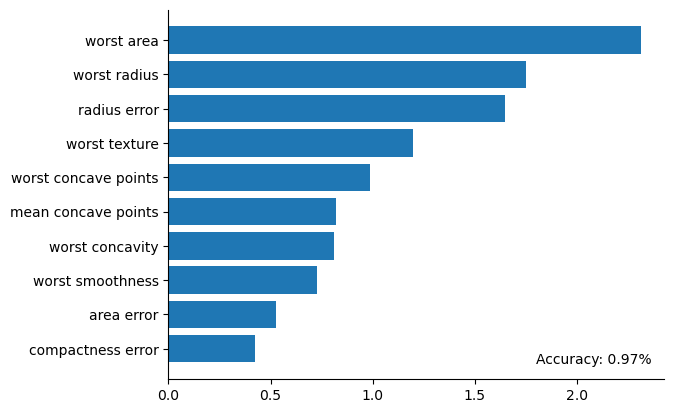

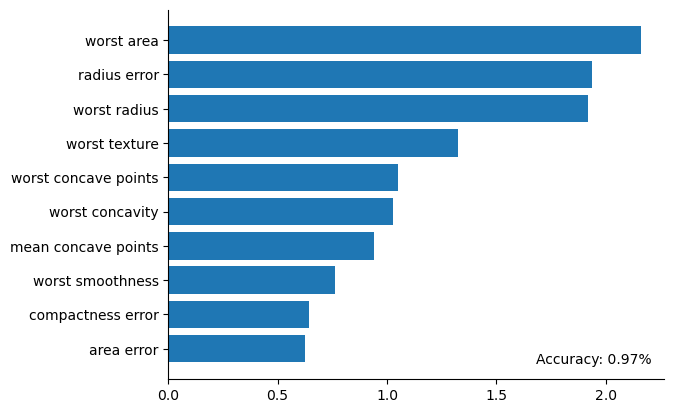

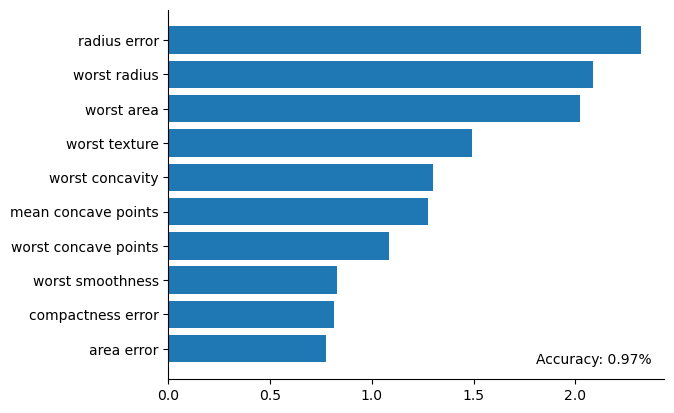

In [24]:
m['Logistic (L1)'].plot_regularization(feature_names)

The first three plots bear no meaning, we can specify to not show it and select only a few plots using the `start_num` and `num_settings` parameter.

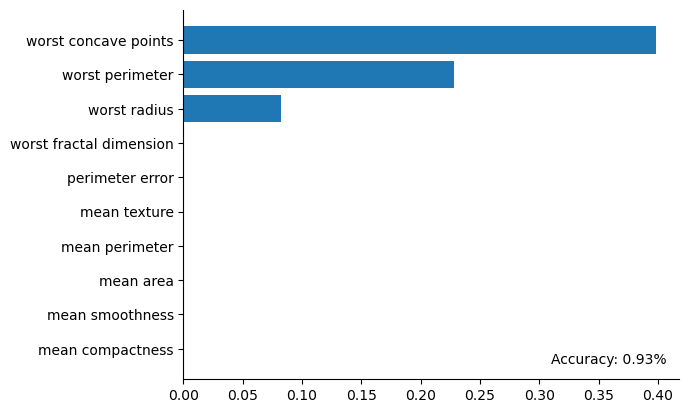

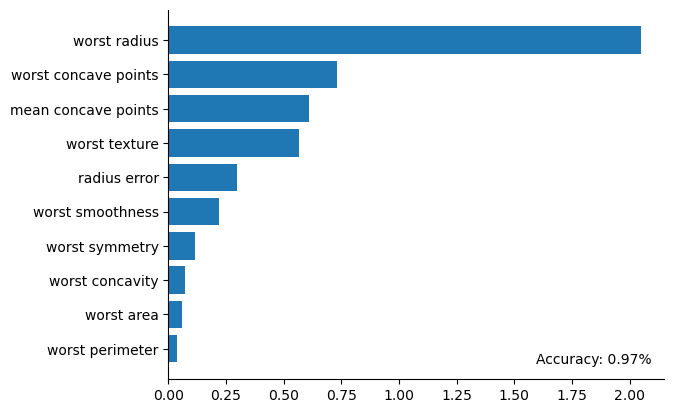

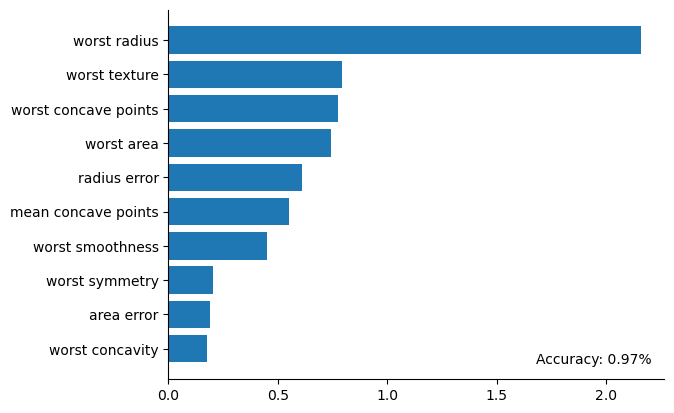

In [25]:
m['Logistic (L1)'].plot_regularization(feature_names,
                                       start_num=3, num_settings=3)

We were quite off in our visual inspection, we only got `worst radius` correct. In addition, `worst concave points` and `worst perimeter` are the last few to survive after high regularization. The `plot_regularization` enabled us to see which feature actually survives after high regularization and the corresponding accuracy of the prediction.

#### 3.1.3 Accuracy versus number of features

Usually, when we are dealing with a lot of features, we want to select only a few. `MLModels.plot_accuracy_num_features` plots the accuracy as a function of number of features.

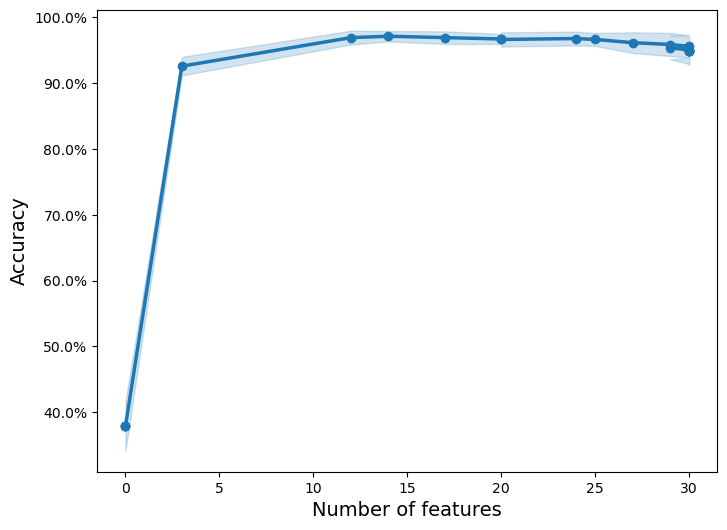

In [26]:
m['Logistic (L1)'].plot_accuracy_num_features()

Here we notice that just after included more than 10 features, our accuracy settled to a 90%+ accuracy. This corresponds to the 5th setting as shown from the previous plots (first three settings had zero features, fourth had 3, fifth had approximately 97% accuracy). This setting corresponds to `C = 0.10` as shown by the code below.

In [27]:
m['Logistic (L1)']._setting[4]

0.1

We use the next method `get_included_features` to determine which features are these exactly

#### 3.1.4 Get included features

`MLModels.get_included_features` requires us to specify which setting to inspect. In our case we are interested in the third setting of `C` which is equal to `0.001`. The list of features are,

In [28]:
included_features = m['Logistic (L1)'].get_included_features(0.1)
print(list(included_features))
print(f"\nnumber of features included: {len(included_features)}")
print(f"number of features in dataset: {len(feature_names)}")

['mean concavity', 'mean concave points', 'radius error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst concavity', 'worst concave points', 'worst symmetry']

number of features included: 12
number of features in dataset: 30


Which means we only need 12 out of the 30 features in the dataset to predict up to 97% accuracy.

### 3.2 Tree feature importance

We could also replicate the same analysis using tree models. First, let us train a Decision Tree model using our dataset.

In [29]:
# Specify the models to be used
use_methods = ['Decision Tree']

# Train and test models
m = MLModels.run_classifier(X, label, feature_names, task='C',
                            use_methods=use_methods,
                            n_trials=10,
                            tree_rs=1337)

Training and testing: Decision Tree model


Iter: 10: 100%|██████████| 500/500 [00:03<00:00, 144.14it/s]


By using the `MLModels.plot_feature_importance` we could also inspect the important features using the tree models feature importance function.

<AxesSubplot: xlabel='Importance', ylabel='Feature'>

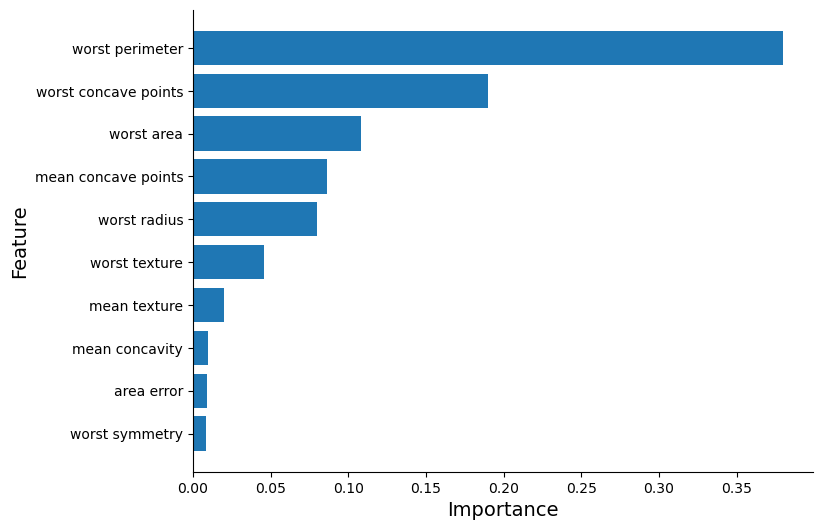

In [30]:
m['Decision Tree'].plot_feature_importance(feature_names)

### 3.3 Permutation importance

For more complex models such as ensemble methods, sometimes there is no regularization or tree importance plots to generate. An example is the `MLP Classifier` model. In this case, it is useful to have a permutation importance plotter. 

The code below shows how to use the `MLModels.plot_permutation_importance` function.

First, we select, initialize, and fit the model. This may also be done via sklearn functions. Here we specifically use the `MLModels.all_methods`.

In [31]:
# First select or initialize the model - this can also be done via sklearn
model = MLModels.all_methods()['Classification']['MLP Classifier'].model()

# Fit the model using the data
est = model.fit(X, label)

Next we plot the permutation importance using the function `MLModels.plot_permutation_importance`. The summary of required and optional parameters are enumerated below:
`MLModels.plot_permutation_importance` required parameters:
1. `est` - trained sklearn estimator
2. `X` - input features
3. `y` - target features

`MLModels.plot_permutation_importance` optional parameters:
1. `feature_names` - list of feature names
2. `num_feat` - number of features to include in the plot
3. `scorer` - scorer to be used
4. `n_repeats` - number of times to permute a feature
5. `random_state` - random state of the permutations

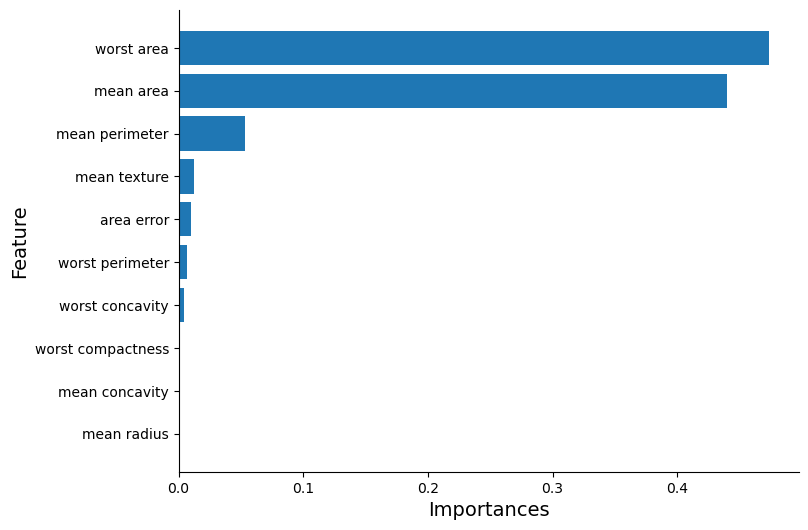

In [32]:
ax = MLModels.plot_permutation_importance(est, X, label, feature_names)

Here we notice that the important features for the `MLP Classifier` are `worst area`, `mean area`, and `mean perimeter`. If we wish to determine the marginal effects of this parameters to our model, we will use the method in the next discussion.

### 3.4 Partial dependence plots

The above interpretation plots, show us only the important features deemed by the model. If we want to determine the exact effect of varying each parameter, we can use the `MLModels.plot_partial_dependence` function. The required parameters are shown below.

`MLModels.plot_partial_dependence` required parameters
1. `est` - trained sklearn estimator
2. `X` - input features
3. `features` - features to be inspected
4. `feature_names` - list of the feature names

In our case let us determine the marginal effects of `worst area` and `mean area` to our estimator.

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn

/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(
/home/llorenzo/.conda/envs/mltools/lib/python3.8/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but MLPClassifier was fitted without feature names
  warnings.warn(


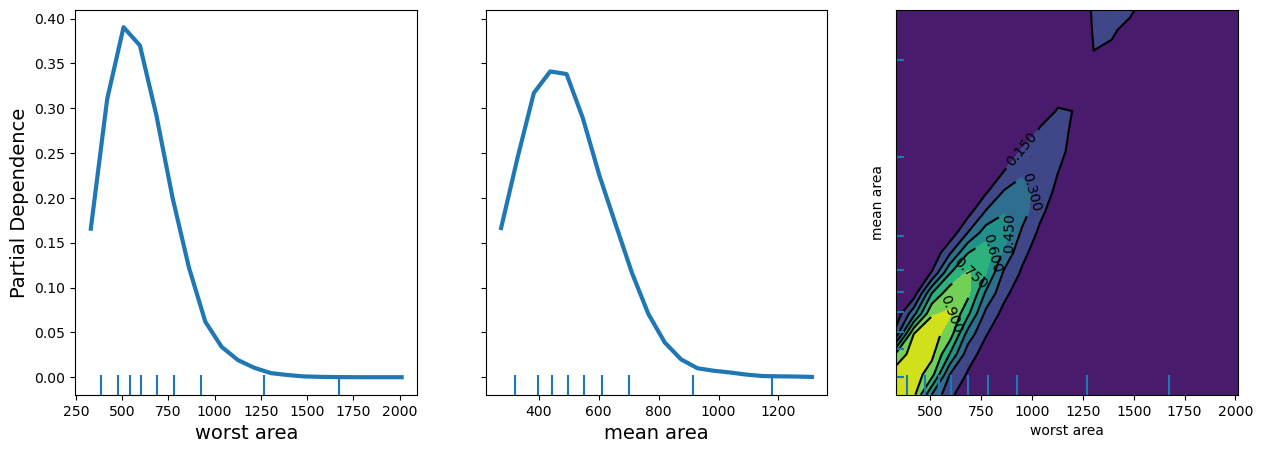

In [33]:
fig, ax = MLModels.plot_partial_dependence(
    est, X, ['worst area', 'mean area', ('worst area', 'mean area')], 
    feature_names)

Plots show the effect of `worst area` and `mean area` values, with the prediction value and their dependence with each other.